# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [14]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
print('skip')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *CHOICE: Grade 8 MATH*

How many years of data are logged in our dataset? 

In [9]:
# @@@ 1
allYears = df['YEAR'].unique()
print(f'There are {len(allYears)} years in our dataset.')


There are 33 years in our dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [17]:
# @@@ 2

michiganAvg = df[df['STATE']=='MICHIGAN']['AVG_MATH_8_SCORE'].mean()
ohioAvg = df[df['STATE']=='OHIO']['AVG_MATH_8_SCORE'].mean()
if michiganAvg > ohioAvg:
    print(f'Michigan average of {michiganAvg} is higher than Ohio avg of {ohioAvg}')
elif michiganAvg < ohioAvg:
    print(f'Ohio average of {ohioAvg} is higher than Michigan avg of {michiganAvg}')
else:
    print(f'Both averages of {michiganAvg} are the same')

Ohio average of 282.25 is higher than Michigan avg of 276.1666666666667


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3
allAvgfor2019 = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
print(f'Average grade 8 score across all states for 2019 is {allAvgfor2019}')

281.2641509433962


For each state, find a maximum value for your chosen test score

In [ ]:
# @@@ 4
allStateMax = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()
print(allStateMax)

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [36]:
# @@@ 5
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df['AVG_MATH_8_SCORE'] = df['AVG_MATH_8_SCORE'].fillna(np.nan)
df.loc[df['ENROLL'] == 0, 'AVG_MATH_8_SCORE'] = np.nan
cleanVersion = df.dropna(subset='ENROLL')
print(cleanVersion)


             PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
51          1993_ALABAMA        ALABAMA  1993   727716.0      2827391.0   
52           1993_ALASKA         ALASKA  1993   121156.0      1191398.0   
53          1993_ARIZONA        ARIZONA  1993   676297.0      3427976.0   
54         1993_ARKANSAS       ARKANSAS  1993   311432.0      1346909.0   
55       1993_CALIFORNIA     CALIFORNIA  1993  5129788.0     28043338.0   
...                  ...            ...   ...        ...            ...   
1270       2016_VIRGINIA       VIRGINIA  2016  1283493.0     16259274.0   
1271     2016_WASHINGTON     WASHINGTON  2016  1083973.0     14964364.0   
1272  2016_WEST_VIRGINIA  WEST_VIRGINIA  2016   276764.0      3391579.0   
1273      2016_WISCONSIN      WISCONSIN  2016   857736.0     11697466.0   
1274        2016_WYOMING        WYOMING  2016    94511.0      2044669.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
51           331409.0    

Feature engineering justification: **<I first created a simple new column that calculates the expenditure_by_student (expenditure / enroll). Then, I filled AVG_MATH_8_SCORE empty cells with numpy.nan. I update both the enrolled empty cells to zero and the AVG_MATH_8_SCORE to nan since without an enrolled, we cannot do the proper division to calculate the average. Then, I dropped these rows for data cleanup.>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

AttributeError: 'DataFrame' object has no attribute 'show'

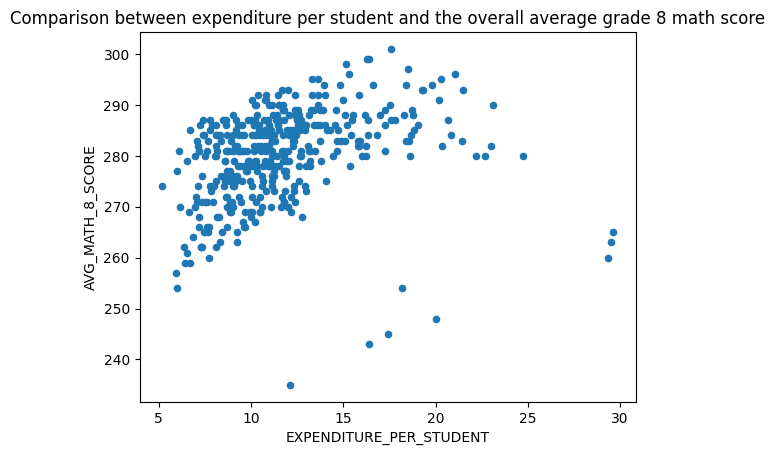

In [40]:
# @@@ 6

col_name = 'AVG_MATH_8_SCORE'

copyVersion = df.dropna(subset=['EXPENDITURE_PER_STUDENT', 'AVG_MATH_8_SCORE']).copy()
copyVersion.plot.scatter(x="EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE", title="Comparison between expenditure per student and the overall average grade 8 math score")
copyVersion.show()


**<CAPTION FOR VIZ 1>**

Our goal with this graph is to see whether or not there is a relationship between how much money the average student gets and the grade 8 math score qualities. We also want to try to see if we can establish some sort of regression relationship model. 


**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

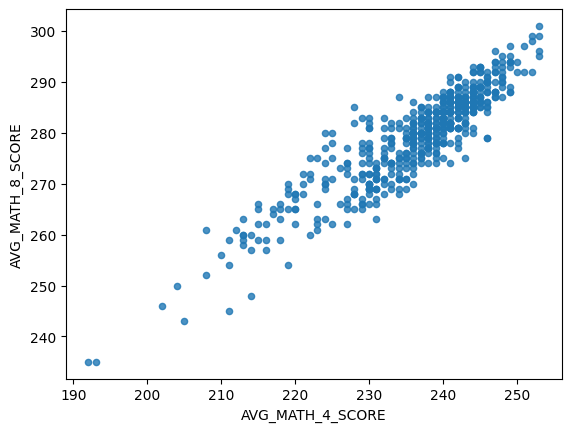

In [48]:
# @@@ 7

df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)

**<CAPTION FOR VIZ 2>** We are basically trying to see if there's some relationsihp between the average math score when in fourth grade vs. eight grade. Seems that those who score high will also score high for the 8th grade version. Can probably draw a strong regression linear line.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# @@@ 8

# X =
# y = 

In [ ]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# @@@ 10
# import your sklearn class here


In [ ]:
# @@@ 11
# create your model here
# model = 

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")